## <center><font color="#992244">ESTATÍSTICA COMPUTACIONAL</font></center>

### <center><font color="#992244">ALLAN PEREIRA FENELON</font></center>

In [819]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statistics as ss
import math
import seaborn as sn



# Autor: Allan Pereira Fenelon
# Universidade Federal do Cariri
# Estatística Computacional


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



isInKaggle = False

ROOT = "/kaggle/input/spaceship-titanic/" if isInKaggle else "C:/Users/allan/OneDrive/Área de Trabalho/Projeto_EC/data/"

SAIDA = "/kaggle/working/" if isInKaggle else "C:/Users/allan/OneDrive/Área de Trabalho/Projeto_EC/data/"

TRAIN = ROOT + "train.csv"
TEST = ROOT + "test.csv"


## <center> 1. Contextualização</center>

<center><img width="860" src="https://64.media.tumblr.com/75c4caed595ceb087fa55320d15129e3/3014c92243550544-06/s540x810/af9aa46c09ae4f2775f4c5203ebec577104574e0.gifv"></center>

Estamos no ano de __2912__ na viagem inaugural da espaçonave interestelar <font color="red">__SpaceShip Titanic__</font> que foi lançada à um mês atrás. A viagem inaugural da <font color="red">__SpaceShip Titanic__</font> contava com cerca de 13000 passageiros a bordo.

A <font color="red">__SpaceShip Titanic__</font> partiu na sua viagem inaugural com emigrantes do nosso sistema solar para três exoplanes recém habitáveis, que são eles TRAPPIST-1e, PSO J318.5-22 e 55 Cancri e.

Quando <font color="red">__SpaceShip Titanic__</font> estava contornando Alpha Centauri que era caminho do seu primeiro destino o 55 Cancri e o <font color="red">__SpaceShip Titanic__</font> colidiu com uma anomalia do espaço-tempo que estava escondia em uma nuvem de poeira. Infelizmente, quase da metade dos passageiros foram transportados para uma dimensão alternativa.

<font color="#09ACDB">Nossos resultados visam ajudar o time de resgate recuperar essas pessoas que foram transportadas para uma dimensão alternativa, nosso objetivo é prever se uma dada pessoa foi transportada ou não para essa dimensão alternativa.</font>




## <center>2. Pré-Processamento</center>

### <center>2.1. Leitura dos dados</center>

Faremos a leitura do nosso csv de treino e de teste. TRAIN foi definido anteriormente e é do diretório onde se encontra o csv de treino análogamente serve a explicação para o TEST.

In [820]:
train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### <center>2.2. Análise descritiva</center>

Iremos fazer a análise descritiva de duas variáveis de interesse: __HomePlanet__ e __Age__.

São duas variáveis que são importantes para a nossa modelagem e predição, visto que __HomePlanet__ é o local onde a pessoa embarcou e __Age__ que é a idade de determinado tripulante.

__HomePlanet__: É uma variável qualitativa nominal;

__Age__: É uma variável quantitativa contínua;

Vamos definir agora as funções que servirão para a análise das nossas variáveis escolhidas.

A função a seguir, é essêncial para o estudo das nossas variáveis que iremos fazer a análise descritiva. É dado o nome da variável que queremos que retorne a frequência e o dataframe a qual essa variável pertence, note que como HomePlanet é uma variável qualitativa podemos usar essa função para retornar nossa distribuição de frequência.

In [821]:
def getFrequenciaQualitativa(variavel, dataframe):
    """
    ------

    Essa função retorna a distribuição de frequência de dada variável do DataFrame.

    ------

    Entrada: 
        variavel (String): Nome da coluna que queira a distribuição de frequência;
        dataframe (pandas.core.frame.DataFrame): Data frame a qual a variável pertence.

    ------

    Saída:
        Distribuição de frequência da variável de interesse.

    ------
    """
    display(dataframe[variavel].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':variavel}))
    

A função a seguir nos retorna o gráfico univariado da variável em interesse, a função serve para variáveis qualitativas e é um gráfico de barras.

In [822]:
def getGraficoQuali(variavel, dataframe):
        """
    ------

    Essa função retorna o gráfico de distribuição de frequência Univariado.

    ------

    Entrada: 
        variavel (String): Nome da coluna que queira a distribuição de frequência;
        dataframe (pandas.core.frame.DataFrame): Data frame a qual a variável pertence.

    ------
    """
        ax = sn.countplot(x=variavel, data=dataframe, order=dataframe[variavel].value_counts().index, palette="cividis")
        ax.tick_params(length=0)                               
        ax.bar_label(ax.containers[0]);      

A baixo, definimos nossa função que retorna a frequência bi-variada e nosso gráfico de barras de variável1 por variavel2 que são variáveis qualitativas.

In [823]:
def qualiQualiVariablesAnalysis(varName1, varName2, dataframe):
    """
    ------

    Essa função retorna a frequência bi-variada entre duas variáveis que desejamos analizar e o gráfico de barras. É usada entre duas variáveis qualitativas.
   
    ------

    Entrada:
        varName1 (String): Nome da coluna do dataFrame de interesse, referente a variável.
        varName2 (String): Nome da coluna do dataFrame de interesse, referente a variável.
        dataframe (pandas.core.frame.DataFrame): Data frame a qual a variável pertence.

    ------

    Saída:
        Distribuição de frequência bi-variada e plot do gráfico de barras.

    """
    freqBi = pd.crosstab(index=dataframe[varName1], columns=dataframe[varName2], normalize = "index")#, margins = True
    title = "PROPORÇÃO CONDICIONAL: " + varName2  + " POR " + varName1 
    print("******** " + title + " ********")
    display(freqBi)
    image = freqBi.plot(kind="bar",figsize=(8,8),stacked=False,title=title,fontsize=12)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12) 

A função abaixo nos retorna nossa distribuição de frequência univariada de uma variável quantitativa. A função recebe o nome da variável em que deseja obter a distribuição de frequência e o dataframe a qual ela pertence.

In [824]:
def getFrequenciaQuanti(varName1, dataframe):
    """
    ------

    Essa função retorna a distribuição de frequência de dada variável do DataFrame.

    ------

    Entrada: 
        varName1 (String): Nome da coluna que queira a distribuição de frequência;
        dataframe (pandas.core.frame.DataFrame): Data frame a qual a variável pertence.

    ------

    Saída:
        Distribuição de frequência da variável de interesse.

    ------
    """
    display(dataframe[varName1].value_counts(normalize = True, bins=8).reset_index(name='FREQUÊNCIA').rename(columns={'index':varName1}))


A função a baixo é um auxilio para a analise bi-variada, utilizaremos na análise da variável Age, recebe o nome da variável de interesse sobre outra variável de interesse, assim gerando uma tabela de frequência, ficará mais claro na aplicação.

In [825]:
def qualiQuantiVariablesAnalysis (varName1, varName2, dataframe):
    title = varName1 + " POR " + varName2
    print("******** " + title + " ********")
    print(dataframe[[varName1, varName2]].groupby(varName2).describe())
    boxVarS = dataframe.boxplot(column=varName1,figsize=(8,8),vert=True, by=varName2)
    boxVarS.set_ylabel(varName1,fontsize=12)
    boxVarS.set_xlabel(varName2,fontsize=12)

#### <center>HomePlanet</center>

Existem três locais na qual houve embarque de passageiros, são elas, Earth, Europa e Mars.

- Cerca de 54% embarcaram em Earth;

- Cerca de 25% embarcaram em Europa;

- Cerca de 20% embarcaram em Mars.

Diante a distribuição de frequência, podemos observar que o planeta terra (Eart) foi onde mais houveram embarcação no <font color="red">SpaceShip Titanic</font>, seguida de Europa e depois Mars.

In [826]:
getFrequenciaQualitativa("HomePlanet", train)

,HomePlanet,Frequência
0,Earth,0.541922
1,Europa,0.250942
2,Mars,0.207136


É mais evidente quando temos apelos gráficos, onde Eart é a primeira colocada em quantidade de pessoas que embarcaram com 4602 pessoas, e em seguida Europa com 2131 e por último Mars com 1759 pessoas. Graficamene é fácil ver a proporção de cada embarcação e seu número exato, então chamaremos a função para o plot do gráfico e veremos.

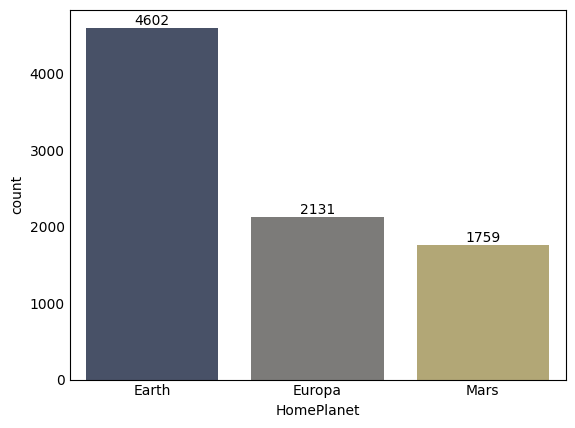

In [827]:
getGraficoQuali("HomePlanet", train)

Vamos agora para o estudo bi-variado dessa variável em questão, como nosso objetivo é o estudo de que a pessoa foi transportado ou não usaremos a variável Transported para o estudo bi-variado de HomePlanet.

<font color="red">__HomePlanet X Transported__</font>
Ao fazermos a distribuição bi-variada de frequência obtemos a proporção pessoas que foram transportadas que embarcaram em cada local especificado.

- __Eart__: Cerca de <font color="green">57% da tripulação que embarcaram não foram transportados</font> e cerca de <font color="pink">42% foram transportados</font>;

- __Europa__: Cerca de <font color="green">34% da tripulação que embarcaram não foram transportados</font> e cerca de <font color="pink">65% foram transportados</font>;

- __Mars__: Cerca de <font color="green">47% da tripulação que embarcaram não foram transportados</font> e cerca de <font color="pink">52% foram transportados</font>;

As pessoas que embarcaram no planeta Europa foram as que mais foram transportadas para uma dimensão alternativa, seguida de Mars e por último Earth.

Notemos que Earth foi a que teve a quantidade maior de embarcação, mas foi a que teve menos tripulantes transportados;

Europa foi o segundo planeta que mais teve embarcação de pessoas na SpaceShip, e foi a que teve a maior quantidade de passeiros transportados para uma dimensão alternativa;

Mars foi o planeta que teve menos embarcação de pessoas no Spaship, porém foi a segunda em maior quantidade de pessoas que foram transportadas para uma dimensão alternativa.

******** PROPORÇÃO CONDICIONAL: Transported POR HomePlanet ********


Transported,False,True
HomePlanet,,
Earth,0.576054,0.423946
Europa,0.341154,0.658846
Mars,0.476976,0.523024


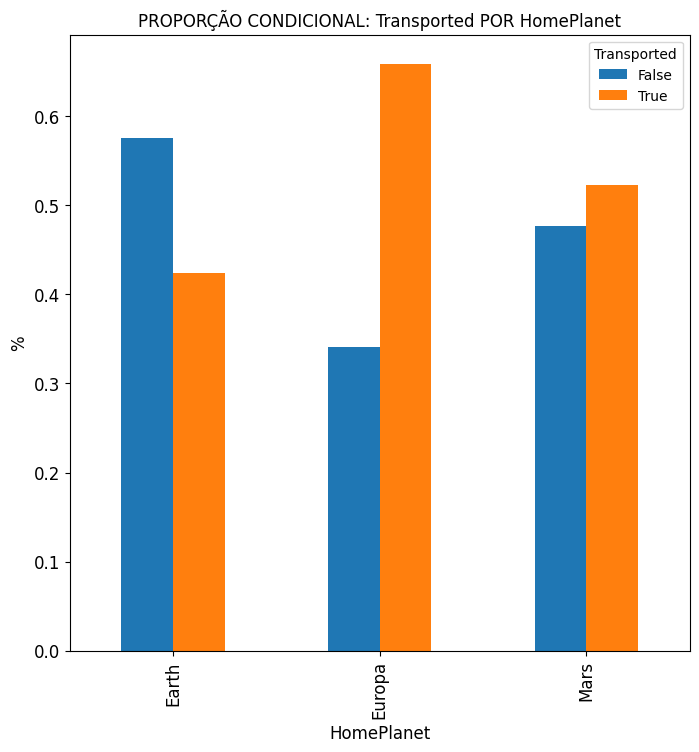

In [828]:
qualiQualiVariablesAnalysis("HomePlanet", "Transported", train)

#### <center>Age</center>

Para analisar a variável Age, vamos ter que obter nossa distribuição de frequência por intervalo de idades, pois Age trata-se de uma variável quantitativa contínua. Temos uma inúmeras variações de idade, logo o mais prático é fazer essa distribuição por frequência de intervalos. Ao fazermos isso, tornamos nossa apresentação mais simplificada mas que por consequ~encia temos uma certa perca de informação.

In [829]:
getFrequenciaQuanti("Age", train)

,Age,FREQUÊNCIA
0,"(19.75, 29.625]",0.317727
1,"(29.625, 39.5]",0.199586
2,"(9.875, 19.75]",0.170137
3,"(39.5, 49.375]",0.120557
4,"(-0.08, 9.875]",0.078109
5,"(49.375, 59.25]",0.064075
6,"(59.25, 69.125]",0.023927
7,"(69.125, 79.0]",0.005292


Ao analizar nosso boxPlot e a impressão que obtemos abaixo que a tripulação:

- __(PRIMEIRO QUATIL 25% dos dados)__: tem até 19 anos de idade;

- __(SEGUNDO QUATIL(MEDIANA) 50% dos dados)__: tem até 27 anos de idade;

- __(TERCEIRO QUARTIL 75% dos dados)__: tem até 38 anos de idade;

- __(OUTILIER)__: Do terceiro quartil ao valor máximo podemos observar no boxplot __outiliers__, que vão de até 38 anos de idade até 80 anos de idade, mas são observações "fora da curva" dos padrões vistos no nosso dataframe.






In [830]:
display(train.Age.describe())

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

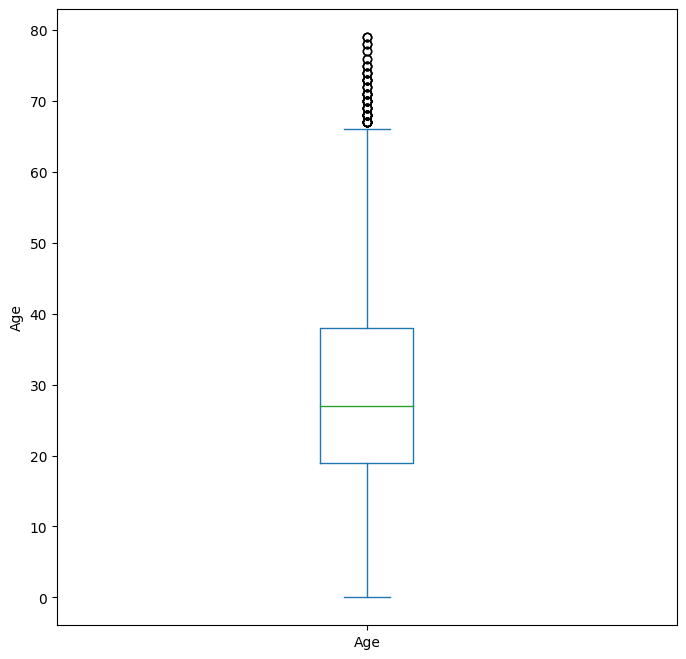

In [831]:
trainBox = train.Age.plot(kind='box', figsize=(8,8), title='');
trainBox.set_ylabel('Age');

Podemos ainda complementar a informação das distribuições de frequência fazendo um aple gráfico, que é o Histograma para esse caso!

Há uma concentração de idade da tripulação, que abordamos anteriormente que é evidente no histograma, logo o histograma é uma ajuda bastante objetiva para a compreensão dessa variável.

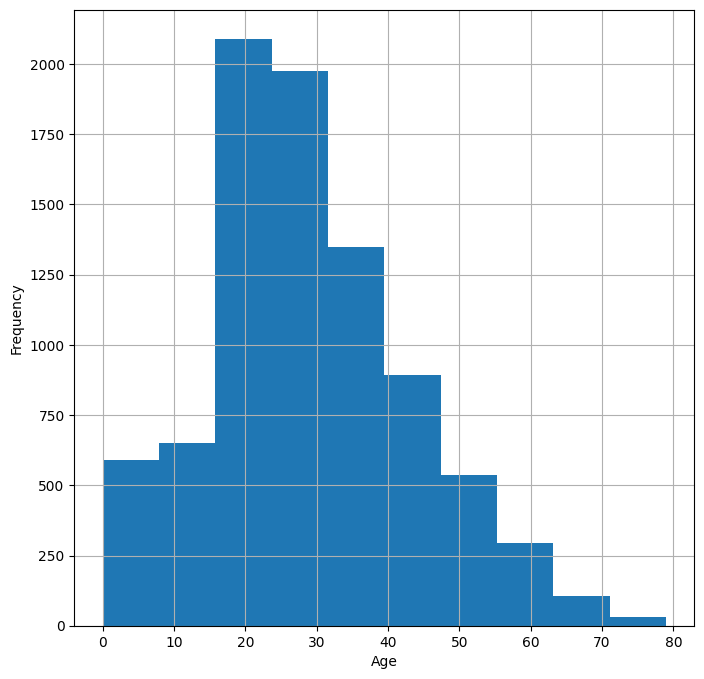

In [832]:
trainHist = train.Age.hist(figsize=(8,8), bins=10);
trainHist.set_xlabel('Age');
trainHist.set_ylabel('Frequency');

Vamos ao estudo bi-variado da variável __Age__, vamos ao estudo de __Age__ com __Transported__ que é nossa variável que iremos prever futuramente.

__TRANSPORTADOS__
Vamos analisar primeiramente a idade da tripulação que foram transportados para uma dimensão alternativa.
- __(Primeiro Quartil)__: Temos que cerca de 25% da tripulação que tinha até 18 anos foram transportados;

- __(Segundo Qaurtil)__: Observamos que até 50% da tripulação que foram transportados tinham até 26 anos;

- __(Terceiro Quartil)__: Até 75% da tripulação que foram transportados tinham até 37 anos de idade;

- __(Outilers)__: Como sempre, obtemos outiliers nas nossas observações, temos algumas obersavações com idades de até 78 anos.

Temos um desvio-padrão de aproximadamente 15 anos de idade e que nossa média é de 27 anos de idade, notemos que como há valores elevados de idade então tanto nossa média quando nosso desvio-padrão crescem.

__NÃO TRANSPORTADOS__
Vamos analisar a idade da tripulação que não foram transportados para uma dimensão alternativa.
- __(Primeiro Quartil)__: Temos que cerca de 25% da tripulação que tinha até 21 anos não foram transportados;

- __(Segundo Qaurtil)__: Observamos que até 50% da tripulação que não foram transportados tinham até 27 anos;

- __(Terceiro Quartil)__: Até 75% da tripulação que não foram transportados tinham até 38 anos de idade;

- __(Outilers)__: Como sempre, obtemos outiliers nas nossas observações, temos algumas obersavações com idades de até 79 anos.

Temos um desvio-padrão de aproximadamente 13 anos de idade e que nossa média é de 29 anos de idade, notemos que como há valores elevados de idade então tanto nossa média quando nosso desvio-padrão crescem.


Em ambos os casos, tanto transportados e não transportados tem média e desvio-padrão parecidos, e as que estão nos quartis são semelhantes, onde entra a questão de que será que a idade tem relação com o fato de ser transportado ou não? Ou ser transportado é apenas um acaso do destino e essa análise de idade não infere nessa relação?

******** Age POR Transported ********
                Age                                                   
              count       mean        std  min   25%   50%   75%   max
Transported                                                           
False        4226.0  29.922858  13.699262  0.0  21.0  27.0  38.0  79.0
True         4288.0  27.748834  15.151705  0.0  18.0  26.0  37.0  78.0


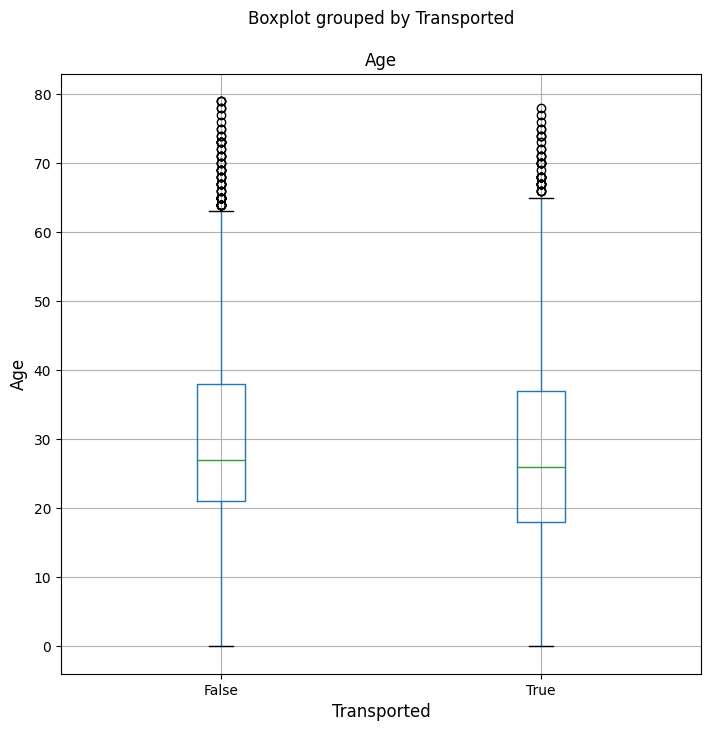

In [833]:
qualiQuantiVariablesAnalysis("Age", "Transported", train)

### <center>2.3. Transformação de variáveis</center>

Para iniciar-mos as transformações de variáveis podemos separar nossa coluna __Cabin__ em três nosvas colunas(Variáveis). 

__Cabin__: Temos o *deck* que se refere a letra respectiva de onde a cabine de algum passageiro está e o Side que tempresenta que o passegeiro está a estibordo ou bombordo, que é o lado da embarcação.

A baixo, temos a função que fará essa separação, temos apenas de passar qual dataframe estamos querendo fazer essa sepração.

In [834]:
def sepCabin(dataframe):

    """
    ------

    Essa função separa e cria novas variáveis referente à variável Cabin

    ------

    Entrada:
        dataframe(pd.DataFrame): dataframe a qual iremos fazer a sepração

    ------
    
    Saída:
        Dataframe com nosvas variáveis que vieram através da separação de variáveis de Cabin
    """
    cabin_deck = []
    cabin_num = []
    cabin_side = []
    for cabin in dataframe.Cabin:
        cabin_sp = None
        #print(cabin)
        try:
            cabin_sp = cabin.split(sep="/")
        except:
            cabin_sp = ['nan', 'nan', 'nan']
        cabin_deck.append(cabin_sp[0])
        cabin_num.append(cabin_sp[1])
        cabin_side.append(cabin_sp[2])
    dataframe = pd.DataFrame({'CabinDeck': cabin_deck, 'CabiNum': cabin_num, 'CabinSide': cabin_side})
    return dataframe

Logo, separaremos nossa variável Cabin do nosso conjunto de treinamento e teste, gerando assim novas variáveis no nosso dataframe.

In [835]:
train = pd.concat([train, sepCabin(train)],axis=1)
test = pd.concat([test, sepCabin(test)],axis=1)

A seguir, obtemos nossas colunas qualitativas e quantitativas, definimos nosso foco da previsão *y_train* e definimos, através das nossas colunas das qualitativas e quantitativas nossos dataframes respectivos.

Essa etapa é importante tanto para a imputação de variáveis quanto para a transformação(Padronização) das nossas variáveis em questão para uma melhor eficacia na nossa modelam, fazendo isso podemos obter uma acurácia melhor do que se não houvesse o tratamento dos dados, que no caso vamos tratar nossos dados faltantes e a transformação das mesmas padronizando.

In [836]:
qualitativaVar = ["HomePlanet", "CryoSleep", "Destination", "VIP", "CabinDeck", "CabinSide"]
quantitativaVar = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa","VRDeck"]

y_train = train["Transported"]

treinoPMDF = train[(qualitativaVar+quantitativaVar)]

KeyError: "['GatoTotal'] not in index"

A baixo, importamos todas as bibliotecas necessárias para, imputação das nossas variáveis e transforamações.

In [ ]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

Definiremos nossos Pipelines para nossas variáveis qualitativas e quantitativas.

__QUANTITATIVA__

Estamos usando a função SimpleImputer para imputar, através da mediana os nossos dados faltantes e após isso estamos usando a função StandardScaler para padronizar nossos dados.


__QUALITATIVA__

Estamos imputando nossos dados faltantes com a observação mais frequente, que seria a moda, estamos aplicando a função OneHotEncoder para transformar nossos dados qualitativos em uma Matriz numérica única e também fazemos a padronização dos nossos dados com a função StandardScaler.

In [ ]:
quantiPipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy = "mean", add_indicator = True)), 
                        ('scaler', MinMaxScaler())
                        ])
qualiPipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy = "most_frequent", add_indicator = True)),
                        ('ohe', OneHotEncoder(sparse_output=False)), 
                        ('scaler', MinMaxScaler())
                        ])

Montamos nosso Pipeline principal, ele que fará a transformação do nosso dataframe usando os piplelines de cada variável que definimos, ele fará o pré-processamento simplificado, se utilizando das variáveis que foram definidas como qualitativas e qwuantitativas e nossos pipilines quantitativos e qualitativos.

In [ ]:
fullPipeline = ColumnTransformer([("quantitativa", quantiPipeline, quantitativaVar), 
                                  ("qualitativa", qualiPipeline, qualitativaVar)]) 
fullPipeline

ColumnTransformer(transformers=[('quantitativa',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck',
                                  'GatoTotal']),
                                ('qualitativa',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(sparse_output=False)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['HomePlanet', 'CryoSleep', 'Destination',
                                  'VIP', 'CabinDeck', 'CabinSide'])])

Aplicamos o pré-processamento no nosso conjunto de treino usando nosso fullPipilene, que foi explicado anteriormente.

In [ ]:
treino = fullPipeline.fit_transform(treinoPMDF)

Agora, transformamos nossa Matriz pré-processada em um DataFrame, com os nomes das colunas respectivas do nosso fullPipeline, note que agora teremos novas variáveis, que são elas as inputações de valores, caso seja imputado terá um valor nessa linha na respectiva coluna.

In [ ]:
treinoOK = pd.DataFrame(treino, columns=fullPipeline.get_feature_names_out())

Aplicamos o pré-processamento no nosso conjunto de test usando nosso fullPipilene, que foi explicado anteriormente.

In [ ]:
teste = fullPipeline.fit_transform(test)

Agora, transformamos nossa Matriz pré-processada em um DataFrame, com os nomes das colunas respectivas do nosso fullPipeline, note que agora teremos novas variáveis, que são elas as inputações de valores, caso seja imputado terá um valor nessa linha na respectiva coluna.

In [ ]:
testeOK = pd.DataFrame(teste, columns=fullPipeline.get_feature_names_out())

Pronto! Nossos dataframes estão prontos para o uso.

### <center>2.4. Partição dos dados de treinamento</center>

Esta etapa é muito importante para separar do banco de treinamento uma parte para treinar nossos modelos e outra para testar o nosso desempenho de previsão. É muito importante para podemos ter uma ideia de que nossas previsões estão dando underfitting ou overfitting e se é o caso ajustar nossos modelos.

A baixo, importamos a biblioteca na qual fará isto por nós, ela é responsável por pegar uma amostra do nosso dataframe de treinamento e separar uma amostra para o treinamento dos nossos modelos e uma amostra para o teste dos nossos modelos.

In [ ]:
from sklearn.model_selection import train_test_split

A baixo realizamos a tarefa de fazer a divisão que foi mensionada, logo estamos preparados para modelar nossos modelos. Passamos nossa Matrix de treino e nossa variável alvo que queremos predizer, queremos uma proporção de conjunto de teste cerca de 2% do conjunto de treinamento e queremos também que esses dados sejam embaralhados antes que seja feito a divisão entre treino e teste, é o que fazemos com random_state.

In [ ]:
X_train, X_teste, Y_train, Y_test = train_test_split(treino, y_train*1,test_size=0.2, random_state=42)

## <center>3. Modelagem</center>

Iniciamos a seção de modelagem de nossos modelos, nesta seção não vamos usar os modelos para a previsão com nosso dataframe de teste, isso deixaremos para a seção __4. Submissão à competição do kaggle__.


Lembremos que, na seção anterior, fizemos toda a pré-processagem dos dados e que dividimos nossos dados da parte de treino em duas: treino e teste. Fizemos isso para que em uma subseção dessa seção possamos medir o desempenho do nosso modelo.

### <center>3.1. Modelos manualemente definidos</center>

Nesta sub-seção vamos fazer a modelagem de modelos cujos hiperparâmetros definiremos, teremos uma sub-seção especifica de otimização que não vai ser a escolha do programador, mas sim vamos ter um processo de otimização de hiperparâmetros.

A seguir, foram feitas as implementações de seis modelos, todos manualemnte definidos. Foram feitas as implementações dos modelos XGBooster, Regressão Logística, Árvore de Decisão, Floresta Aleatória, SVR e ANN.

#### <center>3.1.1. XGBooster</center>

A baixo, importamos a biblioteca do modelo XGBooster.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

Vamos precisas instanciar o nosso modelo com a função *XGBClassifier*.

Configuraremos nossos hiperparâmetros de tal forma que a acuracia do nosso modelo fique bom, foram feitos alguns testes e nossos hiperparâmetros ajustados manualmente, logo obtermos as seguintes configurações de hiperparâmetros:

- __n_estimators(=100)__: Que é relativo ao número de rodadas de reforço;

- __objective(binary:logistic)__: Onde especificamos a terefa de aprendizado do nosso modelo, na qual, como estamos lidando com classificação binária podemos uar a regressão logística para tal;

- __booster(gbtree)__: Podemos especificar qual booster usar, preferimos usar o gbtree pois a acuracia usando-o teve uma melhor acurácia.

- __max_depth(5)__: Refere-se a profundidade de uma árvore, testamos com alguns valores que fossem cnsiderados bons e deixasse nosso modelo mais completo, mas a diferença era pequena e o tempo de execução almentava bastante, poderíamos deixar o padrão também do nosso classifcador.

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, max_leaves = 2, grow_policy = "depthwise")

No próximo passo, estaremos treinando nosso modelo com o conjunto de treinamento, essa parte é importante pois nos próximos passos, usaremos esse modelo treinado para prever.

In [ ]:
xgb_model.fit(X_train, Y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7], got [0 nan 0 1 nan 1 nan 1]

Foi feita a parte de treinamento do nosso modelo, na próxima etapa usaremos uma parte dos nossos dados de treinamento que seria a parte de teste para que possamos preve-lá e que em uma sub-seção a frente possamos medir o desempenho do nosso modelo.

In [ ]:
y_previsaoXGB = xgb_model.predict(X_teste)


#### <center>3.1.2. Regressão Logística</center>

É necessário fazer a importação da biblioteca para a implemntação desse modelo. A baixo, estamos importando a biblioteca necessária para a implementação da Regrssão Logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

Instaciamos nosso modelo de Regressão Logística, utilizando os parametros solver, tol, max_iter, random_state.

- __solver:__ Escolhemos o algoritmo de optimização salga, geralmente é usado em problemas de pequeno porte como este exemplo do SpaceShip Titanic e o algoritmo saga é na prática melhor que o algorimo *liblinear*;

- __tol:__ Estamos utilizando o padrão de tolerância critério de parada;

- __max_iter:__ Estamos usando o valor 500 para definir o valor máximo de iterações realizadas para nosso modelo comvergir;

- __random_state:__ Quando utilizado o algotimo *saga* em solver é definido. Tem como objetivo controlar a quantidade de números aleatórios usados. Estamos usando 0.

Após a instancia do modelo, é feito, com o conjunto de treino do conjunto de treinamento o treino do nosso modelo.

In [ ]:
regressaoLogistica = LogisticRegression(solver='saga', tol=1e-4, max_iter=500, random_state=0) 
regressaoLogistica.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=500, random_state=0, solver='saga')

Com a instância do modelo e o treinamento do mesmo, é possível predizer usando esse modelo, pois o modelo foi treinado, nesta etapa utilizamos o conjunto de teste do nosso conjunto de treinamento para prever e em uma sub-seção adiante poderermos analisar o desempenho do mesmo.

In [ ]:
y_previsaoLogistica = regressaoLogistica.predict(X_teste)*1

#### <center>3.1.3. Árvore de decisão</center>

A baixo, importamos as bibliotecas necessárias para a modelagem do modelo de Árvore de Decisão.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


Instanciaremos nosso modelo de Árvore de decisão se utilizando de dois parâmetros, random_state e min_samples_split.

- __random_state:__ O random_state controla a aleatóriedade do nosso modelo, podemos definir qualquer número inteiro;

- __min_samples_split:__ Podemos definir um número mínimo de amostras que serão necessárias para a divisão de um nó interno, estamos utilizando 150 amostras para essa divisão.

Após a instancia, treinamos nosso modelo, analogamente como fizemos nos modelos anteriores.

In [ ]:
arvoreDecisao = DecisionTreeRegressor(random_state=0, min_samples_split = 150) 
arvoreDecisao.fit(X_train, Y_train)

DecisionTreeRegressor(min_samples_split=150, random_state=0)

Com a instância do modelo e o treinamento do mesmo, é possível predizer usando esse modelo, pois o modelo foi treinado, nesta etapa utilizamos o conjunto de teste do nosso conjunto de treinamento para prever e em uma sub-seção adiante poderermos analisar o desempenho do mesmo.

O nosso modelo não gera 0 e 1 como previsão, gera a probabilidade de com tais aspectos acontercer o nosso foco, que seria ser Transportado ou não, então, como queremos previsões binárias, podemos usar a função round para arredondar nossos valores. Como os valores pertencem ao intervalo 0 e 1 e o round retorna um número inteiro, então sempre teremos ou 0 ou 1 como resultado.

In [ ]:
y_previsaoTree = [round(y_hat) for y_hat in arvoreDecisao.predict(X_teste)]


#### <center>3.1.4. Floresta Aleatória</center>

Importamos as bibliotecas necessárias para a implementação do modelo de Floresta Aleatória.

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

Iremos instanciar nosso modelo se utilizando de dois parâmetros, random_state e min_samaples_split.

- __random_state:__ O random_state controla a aleatóriedade do nosso modelo, podemos definir qualquer número inteiro;

- __min_samples_split:__ Podemos definir um número mínimo de amostras que serão necessárias para a divisão de um nó interno, estamos utilizando 100 amostras para essa divisão.

Após a instancia, treinamos nosso modelo, analogamente como fizemos nos modelos anteriores.

In [ ]:
regressaoFloresta = RandomForestRegressor(random_state=0, min_samples_split = 100) 
regressaoFloresta.fit(X_train, Y_train.values.ravel())

RandomForestRegressor(min_samples_split=100, random_state=0)

Com a instância do modelo e o treinamento do mesmo, é possível predizer usando esse modelo, pois o modelo foi treinado, nesta etapa utilizamos o conjunto de teste do nosso conjunto de treinamento para prever e em uma sub-seção adiante poderermos analisar o desempenho do mesmo.

O nosso modelo não gera 0 e 1 como previsão, gera a probabilidade de com tais aspectos acontercer o nosso foco, que seria ser Transportado ou não, então, como queremos previsões binárias, podemos usar a função round para arredondar nossos valores. Como os valores pertencem ao intervalo 0 e 1 e o round retorna um número inteiro, então sempre teremos ou 0 ou 1 como resultado.

In [ ]:
y_previsaoFloresta = [round(y_hat) for y_hat in regressaoFloresta.predict(X_teste)]

#### <center>3.1.5. Support Vector Regression - SVR</center>

Estaremos importando as bibliotecas necessárias para a implemnetação do modelo SVR.

In [ ]:
from sklearn.svm import SVR

Estaremos instanciando nosso modelo SVR usando os parâmetros C, epsilon e kernel.

- __C:__ É o parâmetro de regularização, estamos utilizando o padrão 1, mas poderíamos usar, para ajustar o nosso modelo qualquer número inteiro estritamente positivo;

- __epsilon:__ Especifica o epsilon dentro do qual nenhuma penalidade está associada na função de perda de treinamento com pontos previstos dentro de uma distância epsilon do valor real, como em c, o valor deve ser estritamente positivo;

- __kernel:__ Especificamos o tipo de kernel que queremos usar, estamos usando o kernel padrão que é o *rbf*.

Após a instancia, treinamos nosso modelo, analogamente como fizemos nos modelos anteriores.


In [ ]:
regressaoSVR = SVR(C=1, epsilon=0.01, kernel= 'rbf')
regressaoSVR.fit(X_train, Y_train.values.ravel())

SVR(C=1, epsilon=0.01)

Com a instância do modelo e o treinamento do mesmo, é possível predizer usando esse modelo, pois o modelo foi treinado, nesta etapa utilizamos o conjunto de teste do nosso conjunto de treinamento para prever e em uma sub-seção adiante poderermos analisar o desempenho do mesmo.

O nosso modelo não gera 0 e 1 como previsão, gera a probabilidade de com tais aspectos acontercer o nosso foco, que seria ser Transportado ou não, então, como queremos previsões binárias, podemos usar a função round para arredondar nossos valores. Como os valores pertencem ao intervalo 0 e 1 e o round retorna um número inteiro, então sempre teremos ou 0 ou 1 como resultado.

In [ ]:
y_previsaoSVR = [round(y_hat) for y_hat in regressaoSVR.predict(X_teste)]

#### <center>3.1.6. Redes Neurais Artificiais - ANN</center>

Importaremos a biblioteca necessária para a implemnetação do modelo ANN.

In [ ]:
from sklearn.neural_network import MLPRegressor

Estaremos instanciando nosso modelo ANN com os parâmetros random_state, hidden_layer_sizes, activation e max_iter.

- __random_state:(0)__ Determina a geração de números aleatórios para os pesos de tendência de inicialização;

- __hidden_layer_sizes:__ Podemos definir a quantidade de números de neurônios na camada oculta, temos (100, ).

- __max_iter:__ Número máximo de iterações. O solucionador itera até a convergência (determinada por 'tol') ou esse número de iterações. 

Após a instancia, treinamos nosso modelo, analogamente como fizemos nos modelos anteriores.


In [ ]:
regressaoANN = MLPRegressor(random_state=0, hidden_layer_sizes=(100, 50, 30, 20, 10, 5), activation="relu", max_iter=2000)
regressaoANN.fit(X_train, Y_train.values.ravel())

MLPRegressor(hidden_layer_sizes=(100, 50, 30, 20, 10, 5), max_iter=2000,
             random_state=0)

Com a instância do modelo e o treinamento do mesmo, é possível predizer usando esse modelo, pois o modelo foi treinado, nesta etapa utilizamos o conjunto de teste do nosso conjunto de treinamento para prever e em uma sub-seção adiante poderermos analisar o desempenho do mesmo.

O nosso modelo não gera 0 e 1 como previsão, gera a probabilidade de com tais aspectos acontercer o nosso foco, que seria ser Transportado ou não, então, como queremos previsões binárias, podemos usar a função round para arredondar nossos valores. Como os valores pertencem ao intervalo 0 e 1 e o round retorna um número inteiro, então sempre teremos ou 0 ou 1 como resultado.

In [ ]:
y_previsaoANN = [round(y_hat) for y_hat in regressaoANN.predict(X_teste)]

#### <center>3.1.7. Observações</center>


Agora, vamos colocar nossos modelos manualmente definidos em uma lista para que, na seção 4 seja usado para a predição e a submissão dessas previsões na plataforma Kaggle.

In [ ]:
modelosManualmenteDefinidos = [xgb_model, regressaoLogistica, arvoreDecisao, regressaoFloresta, regressaoSVR, regressaoANN]

Também vamos criar uma lista com nossas previsões para que, na sub-seção 3.3 seja feito o teste de desempenho dos nossos modelos.

In [ ]:
previsoesManualmenteDefinidos = [y_previsaoXGB, y_previsaoLogistica, y_previsaoTree, y_previsaoFloresta, y_previsaoSVR, y_previsaoANN]

Também iremos criar uma lista com o nome dos nossos modelos, respectivamente o que foram listados a cima tanto em previsões quanto nos modelos, na mesma ordem.

In [ ]:
nomesModelosManualmenteDefinidos = ['XGBooster - MD', 'Regressao Logistica - MD', 'Arvore de Decisao - MD', 'Floresta Aleatoria - MD', 'SVR - MD ', 'ANN - MD']

### <center>3.2. Modelos otimamente definidos</center>

Nesta seção, não vamos instaciar modelos que nós, como programadores definimos os parâmetros. Mas vamos realizar uma série de otimizações do nosso modelo e definir esses hiperparamêtros. Não desejamos lidar como esses hiperparâmetros de maneira direita, ou seja, indo lá e testando kenels, número máximo de geração de números aleatórios por exemplo, queremos que nossa máquina faça isso de maneira automática. 

Iremos fazer o nosso processo de otimazação de parâmetros em três modelos, XGBooster, Floresta Aleatória e Regressão Logística.

Antes de mais nada, devemos fazer uma prévia dos algoritmos que usaremos na implemetação dos nossos modelos, segue eles:

- *BayesSearchCV:* É uma implementação de ajuste dos parâmetros se usando de uma certa pontuação, há um testes de parâmestros no nosso modelo que o modelo que tiver um melhor desempenho, ou melhor, tiver uma melhor pontuação é o modelo que usaremos, pois os hiperparâmetros que foram usados foram o que desempenharam um melhor resultado;

- *GridSearchCV:* Neste modelo, combinamos uma seleção de hiperparâmetros que estabeleceremos e essa função usará elas para estabelecer um melhor modelo para o nosso uso, se utilizando da forma de pontuação, o modelo que conter a melhor pontuação será o que usaremos.

- *RandomizedSearchCV:* Em contraste com GridSearchCV, nem todos os valores de parâmetro são testados, mas um número fixo de configurações de parâmetro é amostrado das distribuições especificadas. 

A baixo, estaremos importando as bibliotecas necessárias para o passo de otimização dos nossos hiperparâmetros.

In [ ]:
from skopt import BayesSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV 


from skopt.plots import plot_objective
from skopt.space import Real, Categorical, Integer
from scipy.stats import uniform


Agora, vamos definir as funções genéricas para a busca de um modelo ótimo usando os algortimos que foram descritos a cima.

#### <center>3.2.1. XGBooster</center>

Na seção de modelos manualmente definidos instânciamos um modelo de XGBooster que nos mesmos fizemos a imputação dos parâmetros usados, fazendo testes e verificando qual desses parâmetros trazia um melhor resultado para nossa predição.

Implementaremos o XGBooster via *BayesSearchCV*, onde já vimos uma explicação teórica desse algoritmo.



A baixo, definimos nossos parâmetros para o uso no algoritmo de otimização. Definimos nosso espaço de possibilidades para os hiperparâmetros n_estimators, max-depth, eta e colsample_bytree. 


- __n_estimators__: Que é relativo ao número de rodadas de reforço;

- __max_depth__: Refere-se a profundidade de uma árvore, testamos com alguns valores que fossem cnsiderados bons e deixasse nosso modelo mais completo, mas a diferença era pequena e o tempo de execução almentava bastante, poderíamos deixar o padrão também do nosso classifcador.

- __eta__: Encolhimento do tamanho do passo usado na atualização para evitar o overfitting.

- __colsample_bytree__: Esta é uma família de parâmetros para subamostragem de colunas. É a proporção de subamostra de colunas ao construir cada árvore. A subamostragem ocorre uma vez para cada árvore construída.

In [ ]:
parsDists={
        'n_estimators': Integer(0, 750, 'uniform'), 
        'max_depth': Integer(5, 10, 'uniform'), 
        'eta': Real(.001, .5, 'uniform'), 
        'colsample_bytree': Real(.1, 1, 'uniform')
         }

A baixo, segue um algoritmo que plota, em gráfico de calor nossos melhores hiperparâmetros.

In [ ]:
def parDisplay(modelFit, parDisti):
    parNames = [name for name, value in parsDists.items()]
    _ = plot_objective(modelFit.optimizer_results_[0],
                    dimensions=parNames,
                    n_minimum_search=int(1e8))


##### <center>3.2.1.1 XGBooster BayesSearchCV</center>

A baixo, importamos a biblioteca para o uso do regressor XGBooster.

In [ ]:
import xgboost as xg

Definimos com a intância do nosso modelo XGBooster e nosso espaço de possibilidades de parâmetros para o algoritmo otimizador.

In [ ]:
modeloXgbOtimo = BayesSearchCV(estimator=xg.XGBClassifier(grow_policy = "depthwise",max_depth=3),
                               search_spaces=parsDists, n_iter=50)


Para obter um modelo otimizado(ótimo) através do algoritmo de otimização *BayesSearchCV*, que se utiliza do espaço de possibilidades dos nossos parâmetros e nos retorna um modelo ótimo, se utilizando de critérios de pontuação que foram implementados em seu algoritmo devemos treinar nosso modelo com nossa amostra que foi divida em seções anteriores e que com o algoritmo de otimização e com testes de parâmetros dentro do espaço de possibilidades de parâmetros um modelo otimizado e treinado, pronto para fazer-mos a predição.

In [ ]:
modeloXgbOtimo.fit(X_train, Y_train)


BayesSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, gpu_id=None,
                                      grow_policy='depthwise',
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate=No...
                                      num_parallel_tree=None, predictor=None,
                                      random_state=None, ...),
              search_spaces={'colsample_bytree': Real(low=0.1, high=1, prior='uniform', transform='normalize'),
                             'eta': Real(low=0.001, high=0.5, prior='uniform', transform='normalize'),
                             'max_depth': Integer(low=5, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=0, high=110, prior='uniform', transform='normalize')})

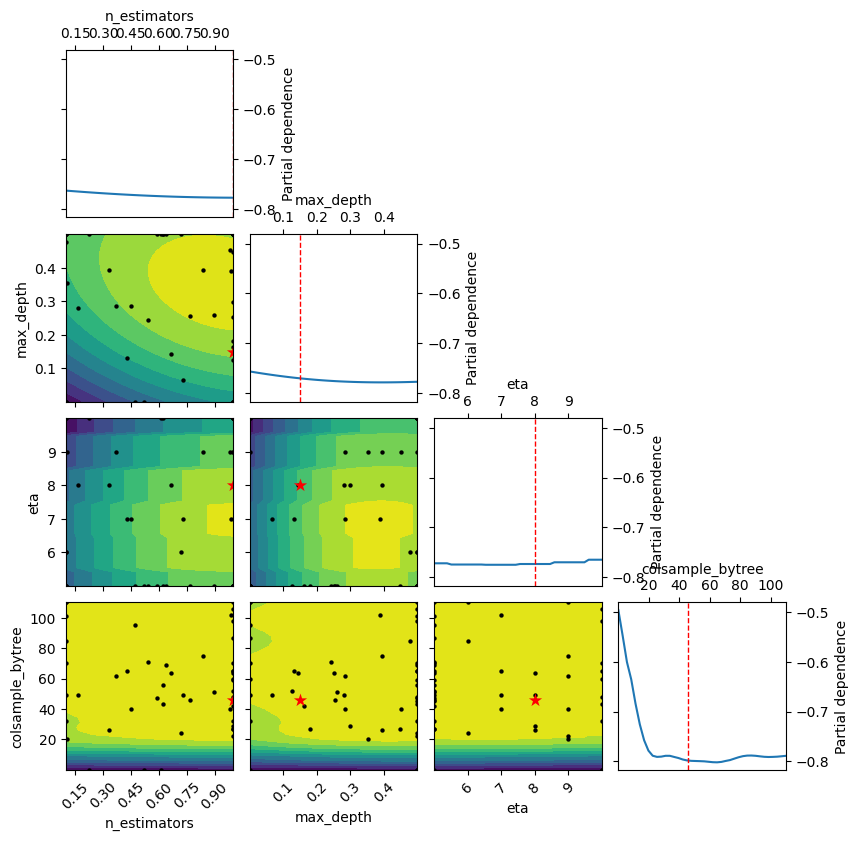

In [ ]:
parDisplay(modeloXgbOtimo, parsDists)

Com o modelo ótimo e treinado em mãos podemos fazer a predição, com nossa amostra de teste para que em sub-seção seguinte possamos análisar a eficiência deste modelo.

In [ ]:
y_previsaoXGBOtimo = modeloXgbOtimo.predict(X_teste)

Obtemos como melhores parâmetros(MODELO OTIMIZADO) os seguintes que seguem no print, não descreveremos aqui pois a cada execução do nosso algoritmo nossos parâmetros podem mudar.

In [ ]:

print('MELHORES PARÂMETROS = ', modeloXgbOtimo.best_params_)


MELHORES PARÂMETROS =  OrderedDict([('colsample_bytree', 1.0), ('eta', 0.1500456264443963), ('max_depth', 8), ('n_estimators', 46)])


#### <center>3.2.2 Floresta Aleatória</center>

Na seção de modelos manualmente definidos instânciamos um modelo de Floresta Aleatória que nos mesmos fizemos a imputação dos parâmetros usados, fazendo testes e verificando qual desses parâmetros trazia um melhor resultado para nossa predição.

Implementaremos a Floresta Aleatória via *GridSearchCV*, onde já vimos uma explicação teórica desse algoritmo.



##### <center>3.2.2.1 Floresta Aleatória GridSearchCV<center>

A baixo, definimos nossos parâmetros para o uso no algoritmo de otimização. Definimos nosso espaço de possibilidades para os hiperparâmetros n_estimators, max_depth, max_features e min_samples_split. 

- __n_estimators__: O número de árvores na floresta.

- __max_depth__: A profundidade máxima da árvore.

- __max_features__: O número de recursos a serem considerados ao procurar a melhor divisão dos nós internos.

- __min_samples_split__: O número mínimo de amostras necessárias para dividir um nó interno.

In [ ]:
randomForestParamsGrid = {
    'n_estimators': [40, 50, 100], 
    'max_depth': [None, 5, X_train.shape[1]], 
    'max_features': [6, 8, X_train.shape[1]], 
    'min_samples_split': [2,10, 12]
                        }

Definimos com a intância do nosso modelo de Floresta Aleatória e nosso espaço de possibilidades de parâmetros para o algoritmo otimizador.

In [ ]:
regressaoFlorestaAleatoria = RandomForestRegressor()
florestaOtima = GridSearchCV(regressaoFlorestaAleatoria, randomForestParamsGrid, cv = 3)

Para obter um modelo otimizado(ótimo) através do algoritmo de otimização *GridSearchCV*, que se utiliza do espaço de possibilidades dos nossos parâmetros e nos retorna um modelo ótimo, se utilizando de critérios de pontuação que foram implementados em seu algoritmo devemos treinar nosso modelo com nossa amostra que foi divida em seções anteriores e que com o algoritmo de otimização e com testes de parâmetros dentro do espaço de possibilidades de parâmetros um modelo otimizado e treinado, pronto para fazer-mos a predição.

In [ ]:
florestaOtima.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 42], 'max_features': [6, 8, 42],
                         'min_samples_split': [2, 10, 12],
                         'n_estimators': [40, 50, 100]})

Com o modelo ótimo e treinado em mãos podemos fazer a predição, com nossa amostra de teste para que em sub-seção seguinte possamos análisar a eficiência deste modelo.

O nosso modelo não gera 0 e 1 como previsão, gera a probabilidade de com tais aspectos acontercer o nosso foco, que seria ser Transportado ou não, então, como queremos previsões binárias, podemos usar a função round para arredondar nossos valores. Como os valores pertencem ao intervalo 0 e 1 e o round retorna um número inteiro, então sempre teremos ou 0 ou 1 como resultado.

In [ ]:
y_previsaoOtimaFloresta = [round(y_hat) for y_hat in florestaOtima.predict(X_teste)]

#### <center>3.2.3 Regressão Logística</center>

Nesta sub-seção, faremos a implementação com algoritmo de otimização para o modelo de Regressão Logística, na seção passada foi feita a implementação manualmente.

Iremos fazer a implementação do modelo de Regressão Logística via *RandomizedSearchCV*, onde já demos uma ideia do funcionamento deste algotimo de otimização.

##### <center>3.2.3.1 Regressão Logística | RandomizedSearchCV</center>

A baixo, definimos nossos parâmetros para o uso no algoritmo de otimização. Definimos nosso espaço de possibilidades para os hiperparâmetros C, penalty, solver e max_iter.

- __C__: Podemos especificar uma penalidade, definimos nosso espaço de possibilidade como *l1*: adicionar um termo de penalidade L1 e *l2*: adiciona um termo de penalidade L2 e é a escolha padrão;

- __penalty__: Inverso da força de regularização; deve ser um float positivo. Como nas máquinas de vetores de suporte, valores menores especificam uma regularização mais forte;

- __solver__: Algoritmo a utilizar no problema de optimização;

- __max_iter__: Número máximo de iterações realizadas para os solucionadores convergirem.

In [ ]:
distribuicao = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
modelRegLog = LogisticRegression(solver='saga', random_state=0, max_iter=1000)

Definimos com a intância do nosso modelo de Regressão Logística e nosso espaço de possibilidades de parâmetros para o algoritmo otimizador.

In [ ]:
regressaoLogisticaotima = RandomizedSearchCV(modelRegLog, distribuicao, random_state=0, n_iter = 10, 
                            verbose=False, cv=3,scoring = 'neg_mean_squared_error')

Para obter um modelo otimizado(ótimo) através do algoritmo de otimização *RandomizedSearchCV*, que se utiliza do espaço de possibilidades dos nossos parâmetros e nos retorna um modelo ótimo, se utilizando de critérios de pontuação que foram implementados em seu algoritmo devemos treinar nosso modelo com nossa amostra que foi divida em seções anteriores e que com o algoritmo de otimização e com testes de parâmetros dentro do espaço de possibilidades de parâmetros um modelo otimizado e treinado, pronto para fazer-mos a predição.

In [ ]:
regressaoLogisticaotima.fit(X_train,Y_train)

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000, random_state=0,
                                                solver='saga'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001EEB5E006D0>,
                                        'penalty': ['l2', 'l1']},
                   random_state=0, scoring='neg_mean_squared_error',
                   verbose=False)

Com o modelo ótimo e treinado em mãos podemos fazer a predição, com nossa amostra de teste para que em sub-seção seguinte possamos análisar a eficiência deste modelo.

In [ ]:
y_prevRegressaoLogisticaOtima = regressaoLogisticaotima.predict(X_teste)

#### <center>3.2.4 Observações</center>

Agora, vamos colocar nossos modelos ótimamente definidos em uma lista para que, na seção 4 seja usado para a predição e a submissão dessas previsões na plataforma Kaggle.

In [ ]:
modelosOtimamenteDefinidos = [modeloXgbOtimo, florestaOtima, regressaoLogisticaotima]

Também vamos criar uma lista com nossas previsões para que, na sub-seção 3.3 seja feito o teste de desempenho dos nossos modelos.

In [ ]:
previsoesOtimamenteDefinidos = [y_previsaoXGBOtimo, y_previsaoOtimaFloresta, y_prevRegressaoLogisticaOtima]

Também iremos criar uma lista com o nome dos nossos modelos, respectivamente o que foram listados a cima tanto em previsões quanto nos modelos, na mesma ordem.

In [ ]:
nomesModelosOtimamenteDefinidos = ['XGBooster - OD', 'Floresta Aleatória - OD', 'Regressao Logistica - OD']

### <center>3.3. Medidas de desempenho </center>

Nesta seção iremos se dedicar a análise de precisão dos nossos modelos, tanto para nossos modelos manualamnete definidos quando para os ótimamente definidos.

Na competição do SpaceShip Titanic, a medida de desempenho adotada é a __ACURÁCIA__.

Esta seção é de grande importância, ela poderemos ver como nossos modelos estão se saindo e se há revelância o uso dos modelos ótimamente definidos para os manualmente definidos, é claro considerando o poder computacional do programador atualmente.

Iremos fazer a análise com algumas medidas de desempenho e também com a medida principal que é a adotada na competição que é a Acurracy.

__ACURACY__

É uma métrica para avaliar nossos modelos de classificação binária. A função é dada por:

$Acuracy=\frac{CP}{TNP}$

onde,

CP = Número de predições corretas

TNP = Total de número de predições 

A função abaixo é definida para retornar a acurácia de previsões passadas a ele.

In [ ]:
def acuracyInModels(y_prevmodels, nameModels):
    """
    ------

    Esta função retorna a Acurácia de uma previsão.

    ------

    Entrada:
        y_prevmodels (lista): Lista com as previsões dos modelos
        nameModels (lista): Nome dos modelos que foram passados em y_prevmodels

    ------

    Saída:
        Acurácia dos modelos
    
    """
    for i in range(len(y_prevmodels)):
        print("Acurácia ", nameModels[i], ":", accuracy_score(Y_test, y_prevmodels[i]))
    

Obtemos a acurácia dos nossos modelos manualmente definidos, note que o modelo que obteve o melhor desempenho foi o modelo de XGBooster, com a melhor acurácia entre todos os modelos analisados.

In [ ]:
acuracyInModels(previsoesManualmenteDefinidos, nomesModelosManualmenteDefinidos)

Acurácia  XGBooster - MD : 0.7814836112708453
Acurácia  Regressao Logistica - MD : 0.7590569292696953
Acurácia  Arvore de Decisao - MD : 0.7734330074755607
Acurácia  Floresta Aleatoria - MD : 0.7826336975273146
Acurácia  SVR - MD  : 0.7400805060379528
Acurácia  ANN - MD : 0.7734330074755607


Obtemos a acurácia dos nossos modelos ótimamente definidos, note que o modelo que obteve o melhor desempenho foi o modelo de Floresta Aleatória, com a melhor acurácia entre todos os modelos analisados.

In [ ]:
acuracyInModels(previsoesOtimamenteDefinidos, nomesModelosOtimamenteDefinidos)

Acurácia  XGBooster - OD : 0.7843588269120184
Acurácia  Floresta Aleatória - OD : 0.7826336975273146
Acurácia  Regressao Logistica - OD : 0.7814836112708453


O desempenho dos nossos modelos em termo de acurácia estão bem semelhantes dos ótimamente definidos para os que foram manualemnte definidos, não houve um ganho grande, como o poder de processamento atual. Mas se modificar-mos o espaço de possibilidade dos nossos hiperparâmetros para o uso do algortimo otimizador poderia-mos obter resultados mnais significativos.

Ou seja, tiramos que a métrica de acurácia avalia simplismente o percentual de acertos. É uma das métricas mais simples de avaliação de modelos de classificação e que é usada para na competição do SpaceShip Titanic, na qual estamos trabalhando.

__RMSE__

O RMSE é raiz do erro quadrático médio (RMSE ou root mean-square error em inglês) é uma métrica de avaliação amplamente utilizada e reconhecida na comunidade de machine learning para medir o desempenho de modelos de regressão. A função é dada por:

$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left ( y_i-p_i \right )^2} $

onde,

n = É o tamanho do conjunto de teste

$y_i$ = É a observação na posição i

$p_i$ = É a previsão da posição i


Temos que, quanto maior for o nosso RMSE pior é nosso modelo, pois sabemos que ele está errando muito.

Abaixo, importaremos a biblioteca necessária para a implementação de uma função para o retorno do nosso RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

A função a seguir, nos retorna os RMSE respectivos das nossas previsões.

In [ ]:
def rmseInModels(y_prevmodels, nameModels):
    """
    ------

    Esta função retorna a Acurácia de uma previsão.

    ------

    Entrada:
        y_prevmodels (lista): Lista com as previsões dos modelos
        nameModels (lista): Nome dos modelos que foram passados em y_prevmodels

    ------

    Saída:
        RMSE dos modelos
    
    """
    for i in range(len(y_prevmodels)):
        print("RMSE ", nameModels[i], ":", mean_squared_error(Y_test*1, y_prevmodels[i]*1, squared=True))

Vamos analisar o RMSE dos nossos modelos manualmente definidos.

O modelo que teve um melhor desempenho em relação ao RMSE foi o modelo XGBooster, temos que esse modelo foi o que obteve um menor erro entre todos.

O modelo de Floresta Aleatória foi o segundo melhor modelo em termos de RMSE.

Obtivemos que o pior modelo, que obteve o pior desempenho em termos de RMSE foi o modelo SVR, ou seja, foi o modelo que mais errou nas previsões.

In [ ]:
rmseInModels(previsoesManualmenteDefinidos,nomesModelosManualmenteDefinidos)

RMSE  XGBooster - MD : 0.2185163887291547
RMSE  Regressao Logistica - MD : 0.24094307073030477
RMSE  Arvore de Decisao - MD : 0.22656699252443932
RMSE  Floresta Aleatoria - MD : 0.21736630247268546
RMSE  SVR - MD  : 0.25991949396204717
RMSE  ANN - MD : 0.22656699252443932


Vamos analisar o RMSE dos nossos modelos otimamente definidos.

O modelo que teve um melhor desempenho em relação ao RMSE foi o modelo XGBooster, temos que esse modelo foi o que obteve um menor erro entre todos.

O modelo de Floresta Aleatória foi o segundo melhor modelo em termos de RMSE.

Obtivemos que o pior modelo, que obteve o pior desempenho em termos de RMSE foi o modelo de Regressão Logística, ou seja, foi o modelo que mais errou nas previsões.

In [ ]:
rmseInModels(previsoesOtimamenteDefinidos, nomesModelosOtimamenteDefinidos)

RMSE  XGBooster - OD : 0.21564117308798159
RMSE  Floresta Aleatória - OD : 0.21736630247268546
RMSE  Regressao Logistica - OD : 0.2185163887291547


## <center>4. Submissão à competição do Kaggle</center>

Nesta seção iremos fazer a análise descritiva de duas das principais variáveis do nosso conjunto de teste e em uma subseção iremos fazer a submissão das nossas previsões ao Kaggle. Também em uma subseção mostraremos como se saimos ao submeter o nosso projeto na competição do Kaggle.

### <center>4.1. Análise Descritiva do Conjunto de Teste</center>

Para seguir uma linha de reciocinio, usaremos as mesmas variáveis que foram feitas a análise descritiva no conjunto de treinamento, sendo ela a variável _Age_ e _HomePlanet_. Relembrando a seção passada temos que:

__HomePlanet__: É uma variável qualitativa nominal;

__Age__: É uma variável quantitativa contínua;

Usaremos os algotirmos que foram mostrados na seção *2.* *Pré-processamento* *->* *2.2* *Análise* *descritiva* que nos retorna nossos gráficos tanto univariados quando bi-variados e nossas funções que nos retorna nossa distribuição de frequência tanto univariados quando bi-variados.

Como nosso conjunto de teste não contém a variável *Tranported* que é a variável que queremos prever então a análise bi-variada, ao contrário do que foi feito na seção 2 sub-seção 2 não será usada, em contrapartida, usaremos outra variável adequada para cada variável.

#### <center>4.1.1 Age</center>



A variável Age é a variável que contém, com observações contínuas, a idade da triupulação do SpaceShipt Titanic. É muito importante a análise desta variável para o estudo e compreensão da nossa tripulação, mas também fazer um comparativo com nosso conjunto de treinamento que fizemos a análise do conjunto de treinamento.

In [ ]:
test['Age'].head()

0    27.0
1    19.0
2    31.0
3    38.0
4    20.0
Name: Age, dtype: float64

Analisando nossa distribuição de frequência através de intervalos de idade(Frequência por classe) temos que:

- A tripulação se concentra(cerca de 33%) entre 20 anos de idade até 29 anos de idade;

- Cerca de 18% da tripulação têm idade entre 30 anos há 39 anos de idade;

- Cerca de 17% da tripulação têm idade entre 39 anos de idade há 49 anos de idade;

- O restante da tripulação, cerca de 32% tem entre 49 anos de idade há 79 anos de idade.

Com essa análise, podemos observar que a grande maioria da tripulação do SpaceShip Titanic são de pessoas jovens, pois 68% da tripulação têm até 49 anos de idade. Logo, sabemos que o restante da tripulação, cerca de 32%, são de pessoas de meiaidade há 79 anos de idade(idosos).

Esses dados referem-se ao conjunto de teste.

In [ ]:
getFrequenciaQuanti("Age", test)

,Age,FREQUÊNCIA
0,"(19.75, 29.625]",0.333879
1,"(29.625, 39.5]",0.187748
2,"(9.875, 19.75]",0.176759
3,"(39.5, 49.375]",0.122048
4,"(-0.08, 9.875]",0.070376
5,"(49.375, 59.25]",0.058920
6,"(59.25, 69.125]",0.024316
7,"(69.125, 79.0]",0.004676


Ao analizar nosso boxPlot e a impressão que obtemos abaixo, que é a descrição estatística da nossa variável Age é que a tripulação:

- __(PRIMEIRO QUATIL 25% dos dados)__: tem até 19 anos de idade;

- __(SEGUNDO QUATIL(MEDIANA) 50% dos dados)__: tem até 26 anos de idade;

- __(TERCEIRO QUARTIL 75% dos dados)__: tem até 37 anos de idade;

- __(OUTILIER)__: Do terceiro quartil ao valor máximo podemos observar no boxplot __outiliers__, que vão de até 79 anos de idade até 80 anos de idade, mas são observações "fora da curva" dos padrões vistos no nosso dataframe.


Essa análise é semelhante ao que obtivemos no nosso conjunto de treinamento, ou seja, os dados de teste são bem semlehantes ao nosso conjunto de treinamento.






In [ ]:
display(test.Age.describe())

count    4186.000000
mean       28.658146
std        14.179072
min         0.000000
25%        19.000000
50%        26.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

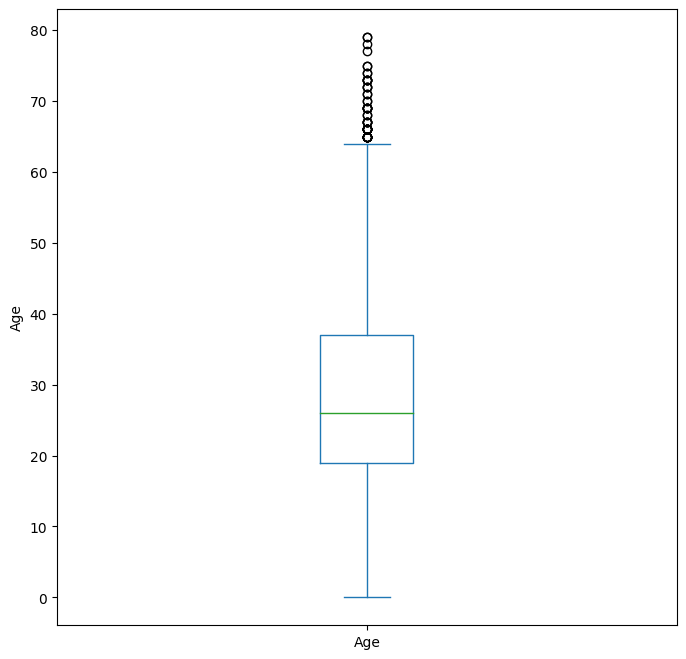

In [ ]:
trainBox = test.Age.plot(kind='box', figsize=(8,8), title='');
trainBox.set_ylabel('Age');

Podemos ainda complementar a informação das distribuições de frequência fazendo um apelo gráfico, que é o Histograma para esse caso!

Podemos notar no nosso histograma uma concentração de idade, que foi abordada anteriormente, que cerca de 68% da tripulação têm idade de até 49 anos de idade, partindo-se dos 19 anos de idade. Quando fazeos um apelo gráfico fica mais evidente e didádico observar.

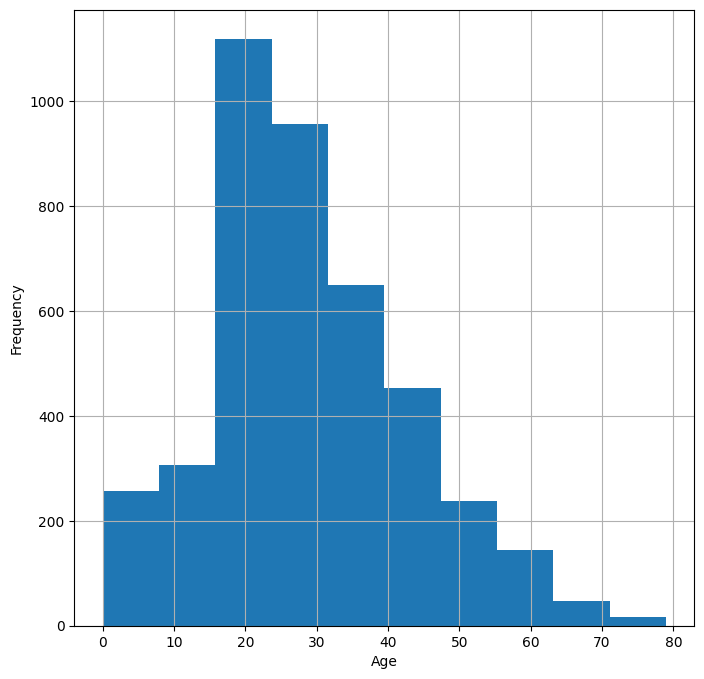

In [ ]:
trainHist = test.Age.hist(figsize=(8,8), bins=10);
trainHist.set_xlabel('Age');
trainHist.set_ylabel('Frequency');

Anteriormente, fizemos a análise bi-variada da variável __Age__ com a variável __Transported__, mas no nosso conjunto de teste é inviável pois não temos a variável __Transported__ no nosso connunto, pois será que iremos fazer a previsão. Em contrapartida, queremos analisar agora a variável __Age__ com seu interesse de planeta para destino.

Vamos fazer essa analise com nossa média de interesse, desvio-padrão e nossos quartis.

__55 Cancri e__

Temos a quantidade de 824 pessoas com destino para __55 Cancri e__. Vamos as nossas análises:

- Das 824 pessoas com esse destino, temos que a média de idade é cerca de 29 anos;

- Temos um desvio padrão de 14 anos de idade, a menor que foi observada levando em consideração outros destinos;

- Cerca de 25% com destino __55 Cancri e__ tem até 20 anos de idade (PRIMEIRO QUARTIL);

- cerca de 50% com destino __55 Cancri e__ tem até 28 anos de idade (SEGUNDO QUARTIL);

- cerca de 75% com destino __55 Cancri e__ tem até 38 anos de idade (TERCEIRO QUARTIL);

- O valor de idade máximo observado, que tem como destino __55 Cancri e__ foi de 75 anos de idade.


__PSO J318.5-22__

Temos a quantidade de 378 pessoas com destino para __PSO J318.5-22__. Vamos as nossas análises:

- Das 378 pessoas com esse destino, temos que a média de idade é cerca de 26 anos;

- Temos um desvio padrão de 26 anos de idade, um desvio-padrão relativamente grande levando em consideração que estamos trabalhando com anos de idade;

- Cerca de 25% com destino __PSO J318.5-22__ tem até 19 anos de idade (PRIMEIRO QUARTIL);

- cerca de 50% com destino __PSO J318.5-22__ tem até 24 anos de idade (SEGUNDO QUARTIL);

- cerca de 75% com destino __PSO J318.5-22__ tem até 35 anos de idade (TERCEIRO QUARTIL);

- O valor de idade máximo observado, que tem como destino __PSO J318.5-22__ foi de 78 anos de idade.

__TRAPPIST-1e__

Temos a quantidade de 2897 pessoas com destino para __TRAPPIST-1e__, onde obtivemos o destino que vai desembarcar mais pessoas, vamos as análises:

- Das 2897 pessoas com esse destino, temos que a média de idade é cerca de 28 anos;

- Temos um desvio padrão de 28 anos de idade, um desvio-padrão relativamente grande levando em consideração que estamos trabalhando com anos de idade;

- Cerca de 25% com destino __TRAPPIST-1e__ tem até 20 anos de idade (PRIMEIRO QUARTIL);

- cerca de 50% com destino __TRAPPIST-1e__ tem até 26 anos de idade (SEGUNDO QUARTIL);

- cerca de 75% com destino __TRAPPIST-1e__ tem até 37 anos de idade (TERCEIRO QUARTIL);

- O valor de idade máximo observado, que tem como destino __TRAPPIST-1e__ foi de 79 anos de idade.


vejamos que, para o destino __PSO J318.5-22__ observamos um número de pessoas mais jovem que vão desembarcar neste destino, isso é evidente ao vermos o BoxPlot. Mas toda a análise foi apartir das nossas análises matemáticas plotadas no console e pela ajuda gráfica do boxPlot.


******** Age POR Destination ********
                  Age                                                   
                count       mean        std  min   25%   50%   75%   max
Destination                                                             
55 Cancri e     824.0  29.555825  14.472139  0.0  20.0  28.0  38.0  75.0
PSO J318.5-22   378.0  26.978836  13.525281  0.0  19.0  24.0  35.0  78.0
TRAPPIST-1e    2897.0  28.665171  14.135532  0.0  20.0  26.0  37.0  79.0


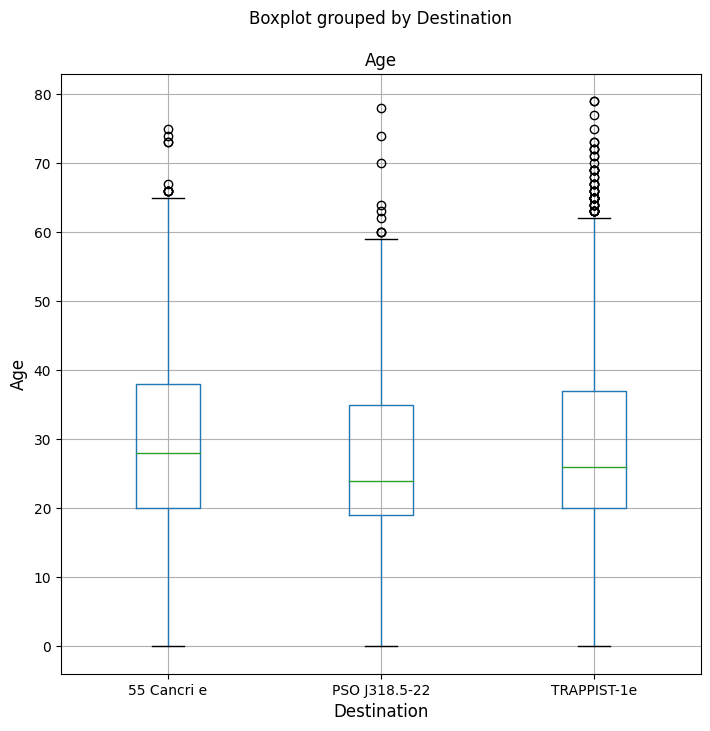

In [ ]:
qualiQuantiVariablesAnalysis("Age", "Destination", test)

#### <center>4.1.2. HomePlanet</center>

Esta variável identifica no dataFrame, tanto de teste quando de treino o local que dada pessoa da tripulação embarcou.

Existem três locais na qual houve embarque de passageiros, são elas, Earth, Europa e Mars.

- Cerca de 54% embarcaram em Earth;

- Cerca de 23% embarcaram em Europa;

- Cerca de 22% embarcaram em Mars.

Diante a distribuição de frequência, podemos observar que o planeta terra (Eart) foi onde mais houveram embarcação no <font color="red">SpaceShip Titanic</font>, seguida de Europa e depois Mars. Isso fazendo a análise no conjunto de teste.

In [ ]:
getFrequenciaQualitativa("HomePlanet", test)

,HomePlanet,Frequência
0,Earth,0.540095
1,Europa,0.239141
2,Mars,0.220764


É mais evidente quando temos apelos gráficos, onde Eart é a primeira colocada em quantidade de pessoas que embarcaram com 2263 pessoas, e em seguida Europa com 1002 e por último Mars com 925 pessoas. Graficamene é fácil ver a proporção de cada embarcação e seu número exato, então chamaremos a função para o plot do gráfico e veremos.

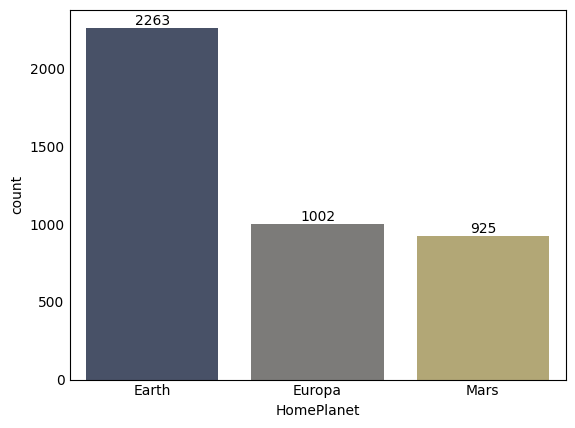

In [ ]:
getGraficoQuali("HomePlanet", test)

Pantido agora para o estudo bi-variado da variável __HomePlanet__. Vamos estudar a variável __HomePlanet__ por __Destination__, ou seja, o estudo da preferência de lugar de cada lugar de embarcação, ou mesmo, a distribuição de frequência de local embarcado por destino.

__Eart__

Observemos que a tripulação que embarcou em Eart têm como destino TRAPPIST-1e(cerca de 70%) seguido de PSO J318.5-22(cerca de 15%) e 55 Cancri e(cerca de 13%).

__Europa__

Vemos que a tripulação que fez o embarque no planeta Europa têm como destino principal TRAPPIST-1e(cerca de 55%) seguido de 55 Cancri e(cerca de 43%) com uma diferença bem pequena entre as duas e por último PSO J318.5-22(cerca de 0,1%) uma pequena porcentagem da tripulação.

__Mars__

Ao analisar a tripulação de Mars vemos que o planeta que terá o maior número de desembarque será o planeta TRAPPIST-1e(cerca de 86%) seguida de 55 Cancri e(cerca de 11%) e PSO J318.5-22(cerca de 2%). Notemos mais 86% da tripulação tem como desembarque o planta TRAPPIST-1e, fazendo com que os restantes dos destinos ficasse com a minoria.


Podemos fazer apelos gráficos, com o gráfico de barras bi-variado, e podemos ver o destaque do que foi analisado anteriormente. É muito importante o uso gráfico para ter uma didática de aprendizagem melhor.

******** PROPORÇÃO CONDICIONAL: Destination POR HomePlanet ********


Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,0.132552,0.159152,0.708296
Europa,0.431772,0.010183,0.558045
Mars,0.112222,0.020000,0.867778


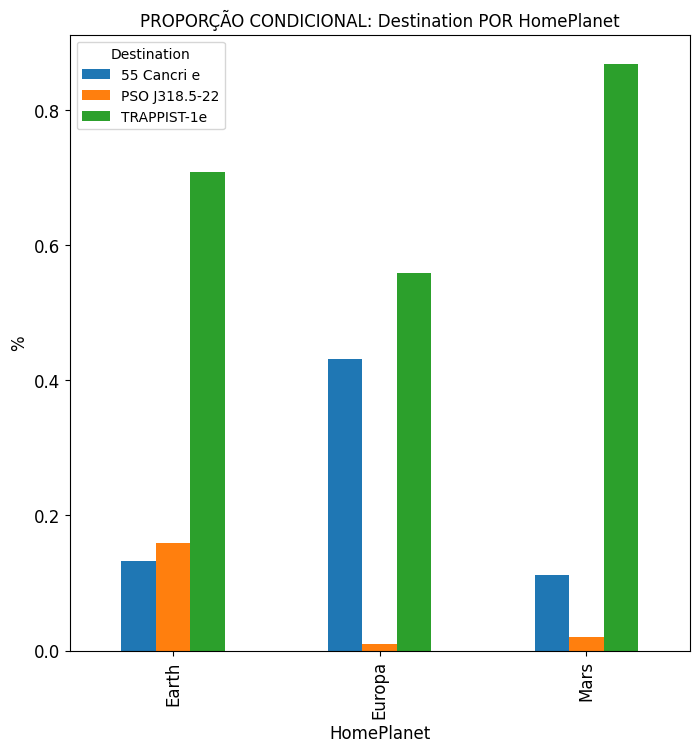

In [ ]:
qualiQualiVariablesAnalysis("HomePlanet", "Destination", test)

### <center>4.2. Algoritmo de construção do arquivo de submissão à plataforma Kaggle</center>

Abaixo, descrevemos nossa função para criação dos nossos arquivos para a submissão à platafoma Kaggle.

As nossas previsões serão feitas com nosso dataframe(testeDF) já pré-processado, feito na seção de pré-processamento. Vamos usar nossos modelos, tanto manualmente definidos como os otimamente definidos e submete-los à plataforma Kaggle. Justamente o que essa função faz, como nossas previsões são do tipo 0 e 1 e nossa submissão tem que ser True ou False usamos uma função para transforma-las em True e False.

In [ ]:
def saveKaggleSubmissionFile(modelos):
    index = 0
    for modelo in modelos:
        prev = [y_hat for y_hat in modelo.predict(teste)]

        reg_submission = pd.DataFrame({'PassengerId': test["PassengerId"], 'Transported': [True if x==1 else False for x in (prev)]})

        reg_submission.to_csv(SAIDA + type(modelo).__name__ + '_submission.csv', index=False)

Usamos a função de submissão do Kaggle, que é a criação do arquivo de submissão para os modelos manualemente definidos.

In [ ]:
saveKaggleSubmissionFile(modelosManualmenteDefinidos);

Usamos a função de submissão do Kaggle, que é a criação do arquivo de submissão para os modelos manualemente definidos.

In [ ]:
saveKaggleSubmissionFile(modelosOtimamenteDefinidos);